In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
!pip install matplotlib

In [ ]:
df = pd.read_csv('aug_train.csv')

In [ ]:
df

In [13]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [14]:
dp = pd.read_csv('placement.csv')

In [15]:
dp

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [16]:
# steps 
#1. Preprocess + EDA + Featured Selection
#2. Extract input and output cols
#3. Scale the values
#4. Train test split 
#5. Train the model
#6. Evaluate the model/model selection
#7. Deploy the model 

In [17]:
dp.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [18]:
dp.shape

(100, 4)

In [38]:
ml = dp.iloc[:,1:]

In [39]:
ml

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [40]:
ml.shape

(100, 3)

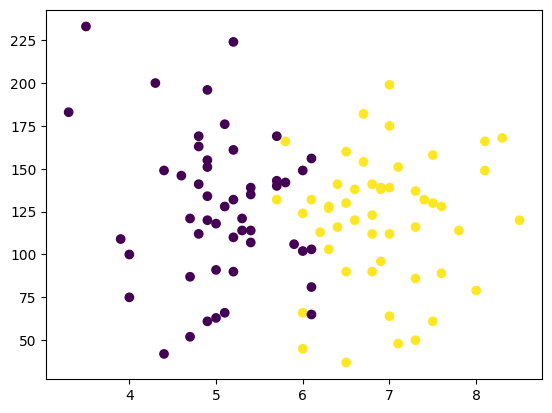

In [41]:
plt.scatter(ml['cgpa'],ml['iq'],c=ml['placement'])

In [42]:
X = ml.iloc[:,0:2]

In [43]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [44]:
Y = ml.iloc[:,-1]

In [45]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [46]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [49]:
!pip install scikit-learn

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [53]:
X_train

,cgpa,iq
6,5.7,143.0
8,6.1,156.0
9,5.1,66.0
62,6.0,102.0
74,6.7,154.0
...,...,...
99,6.2,113.0
79,6.5,90.0
18,4.0,100.0
85,5.8,166.0


In [55]:
X_test

,cgpa,iq
89,4.9,151.0
54,6.4,141.0
12,5.4,139.0
41,5.4,114.0
86,5.1,128.0
72,7.3,116.0
51,4.8,141.0
2,5.3,121.0
15,5.1,176.0
69,8.5,120.0


In [56]:
Y_train

6     0
8     0
9     0
62    0
74    1
     ..
99    1
79    1
18    0
85    1
17    0
Name: placement, Length: 90, dtype: int64

In [57]:
Y_test

89    0
54    1
12    0
41    0
86    0
72    1
51    0
2     0
15    0
69    1
Name: placement, dtype: int64

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [61]:
X_train = scaler.fit_transform(X_train)

In [63]:
X_train

array([[-0.273174  ,  0.50049944],
       [ 0.07930858,  0.81549909],
       [-0.80189786, -1.36526772],
       [-0.00881206, -0.49296099],
       [ 0.60803244,  0.76703761],
       [ 0.25554987,  0.13703831],
       [-1.24250108,  0.57319167],
       [-1.50686302,  1.88165176],
       [-0.00881206, -1.8741133 ],
       [ 1.40111824, -0.80796064],
       [ 1.84172146,  1.05780652],
       [-1.15438044, -0.85642213],
       [-0.71377722, -0.7837299 ],
       [-0.97813915,  1.78472879],
       [-2.21182817,  2.68126625],
       [ 1.57735953, -0.20219208],
       [-0.97813915, -1.48642143],
       [ 0.43179116,  0.18549979],
       [ 1.13675631, -1.75295959],
       [ 1.13675631,  0.35511499],
       [ 2.01796275,  1.106268  ],
       [-0.71377722,  2.46318957],
       [ 1.22487695,  0.23396128],
       [-1.06625979,  1.13049874],
       [ 0.5199118 , -0.05680763],
       [ 0.60803244,  1.4454984 ],
       [-0.273174  ,  0.23396128],
       [ 1.3129976 ,  0.86396058],
       [ 0.69615309,

In [64]:
X_test = scaler.fit_transform(X_test)

In [65]:
X_test

array([[-0.79906403,  0.89781615],
       [ 0.50375776,  0.3470087 ],
       [-0.3647901 ,  0.23684721],
       [-0.3647901 , -1.14017143],
       [-0.62535446, -0.369041  ],
       [ 1.28545083, -1.03000994],
       [-0.88591881,  0.3470087 ],
       [-0.45164488, -0.75460621],
       [-0.62535446,  2.27483479],
       [ 2.32770825, -0.80968696]])

In [68]:
from sklearn.linear_model import LogisticRegression

In [71]:
mod_train = LogisticRegression()

In [74]:
#Model Training
mod_train.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [77]:
Y_pred = mod_train.predict(X_test)

In [78]:
Y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [79]:
Y_test

89    0
54    1
12    0
41    0
86    0
72    1
51    0
2     0
15    0
69    1
Name: placement, dtype: int64

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(Y_pred,Y_test)

1.0

In [87]:
from mlxtend.plotting import plot_decision_regions

In [83]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 12.6 MB/s eta 0:00:00


<Axes: >

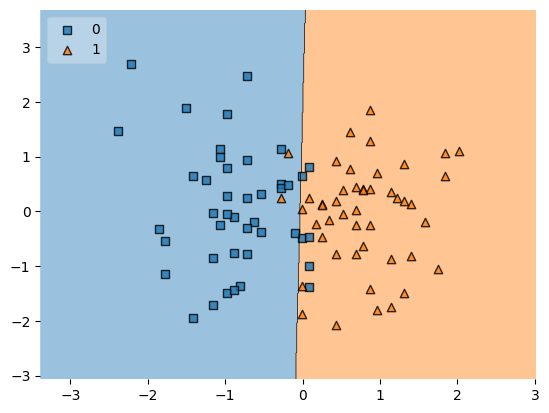

In [88]:
plot_decision_regions(X_train,Y_train.values,clf = mod_train,legend=2)